# Statistical Larning Project based on Insurance case study

**About the Data:**

The Data at hand contains the medical costs of People charactrized by certain Attributes like **Age, Sex, BMI, Children, Smoker, Region & Charges** 

### Import Libraries

In [1]:
import pandas as pd # To Load and Review Data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

### Load and Read Insurance Data as Dataframe

In [2]:
# b. Read Data as Dataframe

insur_data = pd.read_csv("insurance.csv")

In [3]:
insur_data # Normal Load to View Data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


* On Validating the Data we are able to see All Attributes has some entries
* To Validate more will check using info

In [4]:
# a. Shape of Data

insur_data.shape # To check number of entries [Rows & Columns] in the Data Frame

(1338, 7)

In [5]:
# c. Checking the Presence of Missing Values
# Method 1:
insur_data.info() # To Check the detailed Data Type of Each Attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* From the Results we are able to see there are 7 columns available and none of this has **Null Value**

**Datatypes of each Attribute**

In [6]:
insur_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# Method 2:
# One more Validation for Null value identification

insur_data.isnull().values.any()

False

**5 Point Summary of Numerical Attributes**

In [8]:
# Five Point Summary for Dataset
# Print Min, Q1, Q2, Q3, Max

insur_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
insur_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
#Median for the each Attribute

insur_data.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

#### Inference from the Summary

* From the above results it shows that the **Age, bmi, Children & Changes** are Numeriacal Columns 
* **sex, smoker & Region** are Categorical Coulmn
* Age column shows most of People in the Dataset is Adult [> 39 Age]
* Children Data shows that 75% of People has 2 or less than 2 children, very few has more than 2

#### Distribution of bmi, age and Charges

Text(0.5, 0, 'charges')

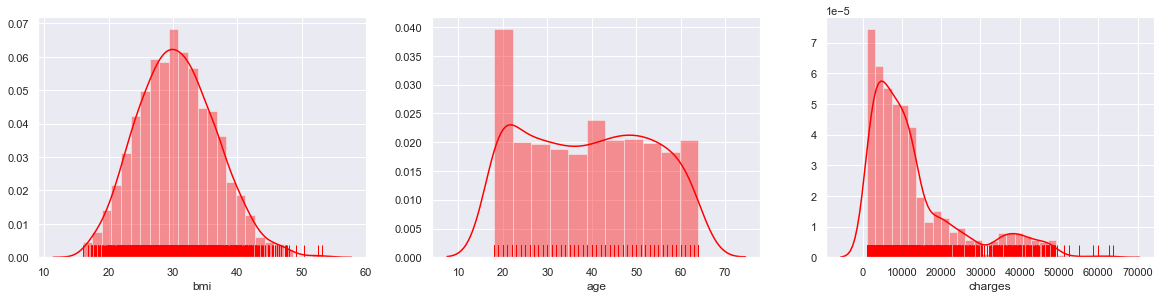

In [11]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.distplot(insur_data['bmi'], rug=True, color= 'red')
plt.xlabel("bmi")

plt.subplot(3,3,2)
sns.distplot(insur_data['age'], rug=True, color= 'red')
plt.xlabel("age")

plt.subplot(3,3,3)
sns.distplot(insur_data['charges'], rug=True, color= 'red')
plt.xlabel("charges")

**Inferences from the Plot**

* BMI is normal Distribution
* Age is evenly Distributed
* Charges are highly Skewed, (i.e) this is also seen in the five point summary that more number of People did claim charges

**Measure Skewness of the bmi, age and charges**

In [12]:
#Measure of Skewness in general
insur_data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [13]:
#Measure Skewness for only the Required Column

print('Measure of skewness of bmi : %.6f ' % insur_data['bmi'].skew())
print('Measure of skewness of age : %.6f ' % insur_data['age'].skew())
print('Measure of skewness of children : %.6f ' % insur_data['children'].skew())

Measure of skewness of bmi : 0.284047 
Measure of skewness of age : 0.055673 
Measure of skewness of children : 0.938380 


**Inferences from the Skewness Data:**

* BMI Skew value is very less like we seen in the Plot
* Age is Uniformly Distributed
* Chages are highly Skewed

**Checking for the Presence of Outliers**

* Outlier can be identified by doing **Box Plot**

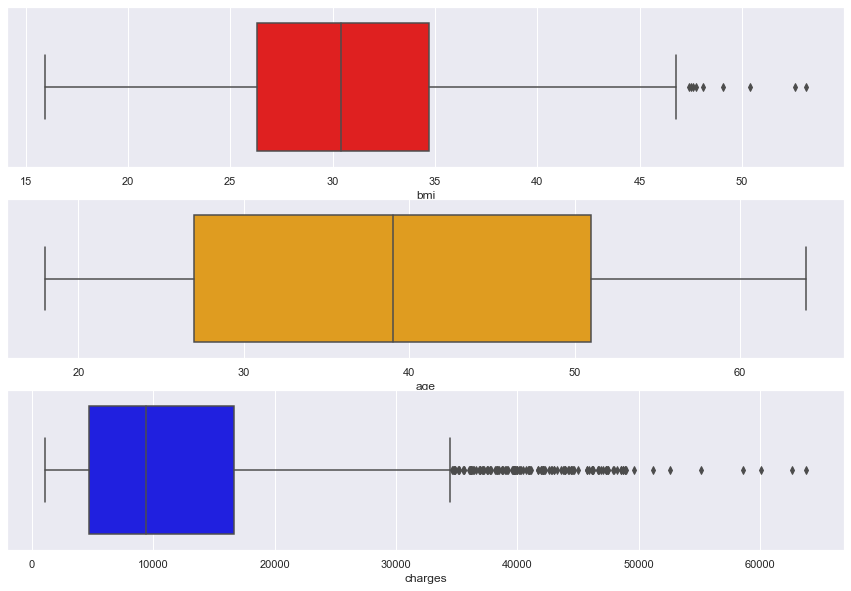

In [14]:
#Checking for the outliers
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= insur_data.bmi, color='red')

plt.subplot(3,1,2)
sns.boxplot(x= insur_data.age, color='orange' )

plt.subplot(3,1,3)
sns.boxplot(x= insur_data.charges, color='blue')


**Inferences From the Boxplot:**

* Charges has too many Outliersas the data is highly skewed
* Age is Uniformly distributed and there are no Outliers
* bmi has minimum Outliers

Text(0.5, 1.0, 'Children distribution')

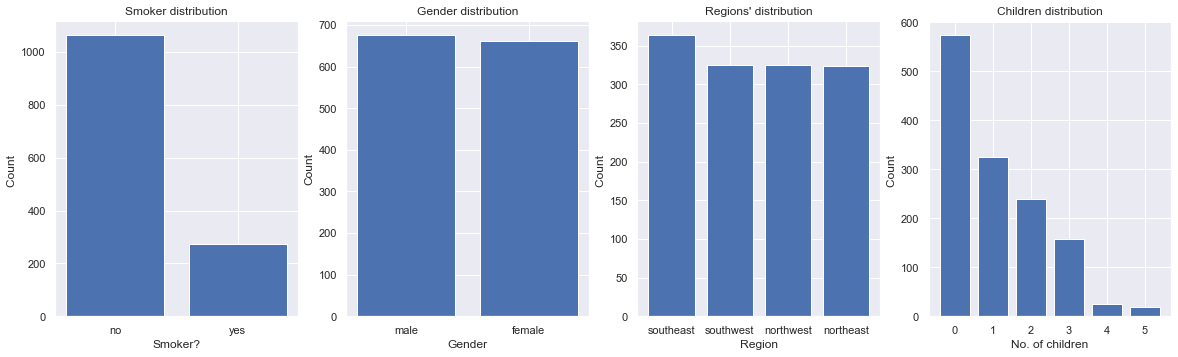

In [15]:
#Distribution of Categorical Columns

plt.figure(figsize=(20,25))

x = insur_data.smoker.value_counts().index   
y = [insur_data['smoker'].value_counts()[i] for i in x]  

plt.subplot(4,4,1)
plt.bar(x,y, align='center')
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = insur_data.sex.value_counts().index   
y1 = [insur_data['sex'].value_counts()[j] for j in x1]  

plt.subplot(4,4,2)
plt.bar(x1,y1, align='center')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = insur_data.region.value_counts().index   
y2 = [insur_data['region'].value_counts()[k] for k in x2]   

plt.subplot(4,4,3)
plt.bar(x2,y2, align='center') 
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = insur_data.children.value_counts().index  
y3 = [insur_data['children'].value_counts()[l] for l in x3]  

plt.subplot(4,4,4)
plt.bar(x3,y3, align='center')  
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")


**Inferences from the Categircal Column Distribution Plot Diagram:**

* There are lot of Non-Smokers in the Dataset
* Equal Distribution in the Gender Category
* More o Less Equal Distribution in the Regions
* Children Distribution shows that more number of People have less than 2 Children and Very few have 4 or 5 Children

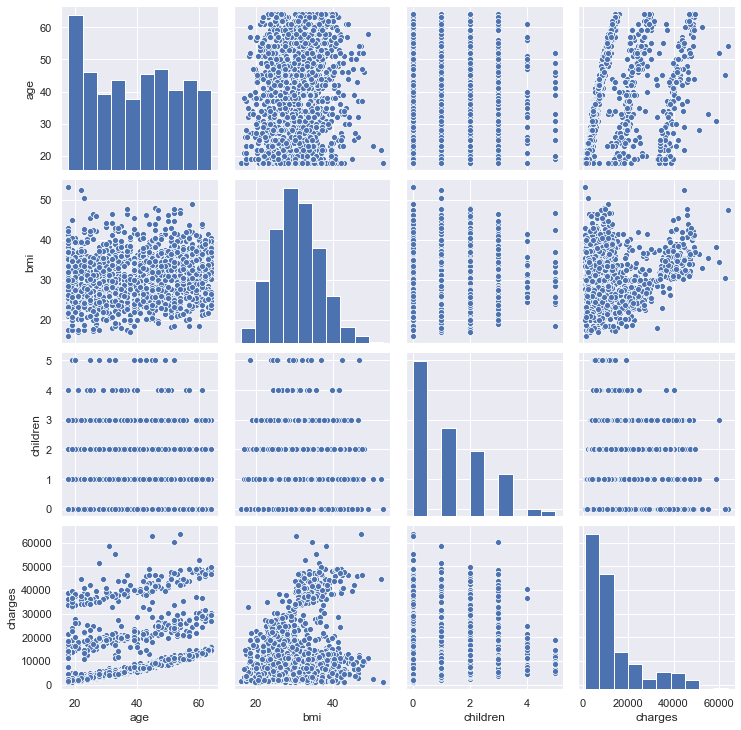

In [16]:
#Pairplot

sns.pairplot(insur_data)

##### Q:4 a) Do charges of people who smoke differ significantly from the people who don't?

In [17]:


insur_data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

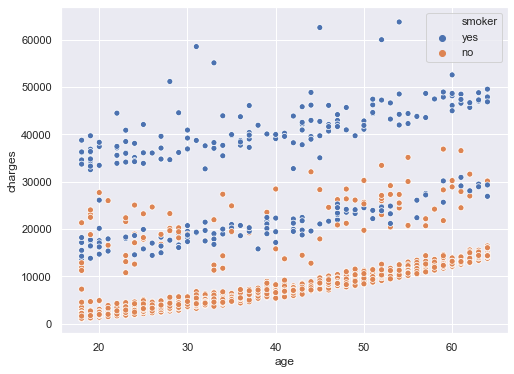

In [18]:

plt.figure(figsize=(8,6))
sns.scatterplot(insur_data.age, insur_data.charges,hue=insur_data.smoker)
plt.show()

In [19]:


print('H0 = The charges of Smokers and Non-Smokers are equal')
print('Ha = The charges of Smokers and Non-Smokers are not equal')

smoker_charges = np.array(insur_data[insur_data['smoker'] == 'yes'].charges)

non_smoker_charges = np.array(insur_data[insur_data['smoker'] == 'no'].charges)

t_statistic,pval = ttest_ind(smoker_charges,non_smoker_charges)
print(pval)


if pval < 0.01:
    print(f'Since the p-value is {round(pval,4)}, the difference is highly significant. So we can reject the null hypothesis')
elif pval < 0.05:
    print(f'Since the p-value is {round(pval,4)}, the difference is significant. So we can reject the null hypothesis')
else:
    print(f'Since the p-value is {round(pval,4)}, the difference is not significant. So we fail to reject the null hypothesis')






H0 = The charges of Smokers and Non-Smokers are equal
Ha = The charges of Smokers and Non-Smokers are not equal
8.271435842177219e-283
Since the p-value is 0.0, the difference is highly significant. So we can reject the null hypothesis


**Inferences :**

* Based on the Scatter Plot the differnec between charges for the Smokers & Non-Smoker is clear
* Smokers CLaim more money than the Non-SMokers

#### Q:4 b) Does bmi of males differ significantly from that of females?

In [20]:
insur_data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [21]:
print('H0 = The bmi of male and female are equal')
print('Ha = The bmi of male and female are not equal')

female_bmi = insur_data[insur_data['sex'] == 'female'].bmi
male_bmi = insur_data[insur_data['sex'] == 'male'].bmi
total_bmi = insur_data['bmi'].sum()

female_bmi_array = np.array(insur_data[insur_data['sex'] == 'female'].bmi)
male_bmi_array = np.array(insur_data[insur_data['sex'] == 'male'].bmi)
t_statistic,bmi_pval = ttest_ind(female_bmi_array,male_bmi_array)
print(bmi_pval)

if bmi_pval < 0.01:
    print(f'Since the p-value is {round(pval,4)}, the difference is highly significant. So we can reject the null hypothesis')
elif bmi_pval < 0.05:
    print(f'Since the p-value is {round(pval,4)}, the difference is significant. So we can reject the null hypothesis')
else:
    print(f'Since the p-value is {round(pval,4)}, the difference is not significant. So we fail to reject the null hypothesis')

H0 = The bmi of male and female are equal
Ha = The bmi of male and female are not equal
0.08997637178984932
Since the p-value is 0.0, the difference is not significant. So we fail to reject the null hypothesis


**Inferences :**

* There is no significant difference in BMI between Gender. Both are Identical

#### Q:4 c) Is the proportion of smoker significantly differ in gender

In [22]:
crosstab = pd.crosstab(insur_data['sex'],insur_data['smoker']) # Contingency table of sex and smoker attributes

crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


In [23]:
print('H0 = The propotion of male and female smokers are equal')
print('Ha = The propotion of male and female smokers are not equal')

female_smokers = insur_data[insur_data['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = insur_data[insur_data['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers

total_female = insur_data.sex.value_counts()[1] # number of females in the data
total_male = insur_data.sex.value_counts()[0] #number of males in the data

print([female_smokers, male_smokers] , [total_female, total_male])

print(f' Proportion of bmi in females, males {round(female_smokers/total_female,2)}%, {round(male_smokers/total_male,2)}% respectively')

from statsmodels.stats.proportion import proportions_ztest
bmi_stat, bmi_pval = proportions_ztest([female_smokers,male_smokers],[total_female,total_male])
print(bmi_pval)

if bmi_pval < 0.01:
    print(f'Since the p-value is {round(bmi_pval,4)}, the difference is highly significant. So we can reject the null hypothesis')
elif bmi_pval < 0.05:
    print(f'Since the p-value is {round(bmi_pval,4)}, the difference is significant. So we can reject the null hypothesis')
else:
    print(f'Since the p-value is {round(bmi_pval,4)}, the difference is not significant. So we fail to reject the null hypothesis')


H0 = The propotion of male and female smokers are equal
Ha = The propotion of male and female smokers are not equal
[115, 159] [662, 676]
 Proportion of bmi in females, males 0.17%, 0.24% respectively
0.005324114164320532
Since the p-value is 0.0053, the difference is highly significant. So we can reject the null hypothesis


**Inferences :**

* Yes the Male has higher number of smokers than Female
* Gender Has effect on the Smoking behaviours.

#### Q: 4 d) Is the distribution of bmi across women with no children, one child and two children, the same?

Mean and standard deviation of bmi of female with 0 children is : 30.36, 5.97
Mean and standard deviation of bmi of female with 1 children is : 30.05, 5.79
Mean and standard deviation of bmi of female with 2 children is : 30.65, 6.63


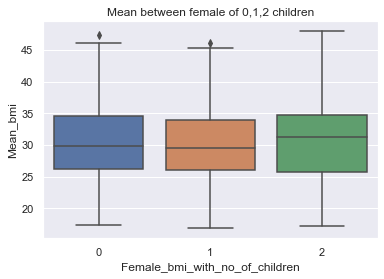

H0 = The mean(𝜇1,𝜇3,𝜇3) of bmi of female with 0,1,2 children are equal
Ha = At least one of the mean(𝜇1,𝜇3,𝜇3) differs
Level of significance(α) = 0.05


In [24]:
print('Mean and standard deviation of bmi of female with 0 children is : %3.2f, %3.2f' % (insur_data[(insur_data.sex=='female')&(insur_data.children==0)]['bmi'].mean(), np.std(insur_data[(insur_data.sex=='female')&(insur_data.children==0)]['bmi'],ddof =1)))
print('Mean and standard deviation of bmi of female with 1 children is : %3.2f, %3.2f' % (insur_data[(insur_data.sex=='female')&(insur_data.children==1)]['bmi'].mean(), np.std(insur_data[(insur_data.sex=='female')&(insur_data.children==1)]['bmi'],ddof =1)))
print('Mean and standard deviation of bmi of female with 2 children is : %3.2f, %3.2f' % (insur_data[(insur_data.sex=='female')&(insur_data.children==2)]['bmi'].mean(), np.std(insur_data[(insur_data.sex=='female')&(insur_data.children==2)]['bmi'],ddof =1)))

mean_bmi_df = pd.DataFrame()
df1            = pd.DataFrame({'Female_bmi_with_no_of_children': '0', 'Mean_bmi':insur_data[(insur_data.sex=='female')&(insur_data.children==0)]['bmi']})
df2            = pd.DataFrame({'Female_bmi_with_no_of_children': '1', 'Mean_bmi':insur_data[(insur_data.sex=='female')&(insur_data.children==1)]['bmi']})
df3            = pd.DataFrame({'Female_bmi_with_no_of_children': '2', 'Mean_bmi':insur_data[(insur_data.sex=='female')&(insur_data.children==2)]['bmi']})

mean_bmi_df = mean_bmi_df.append(df1) 
mean_bmi_df = mean_bmi_df.append(df2) 
mean_bmi_df = mean_bmi_df.append(df3) 

sns.boxplot(x = "Female_bmi_with_no_of_children", y = "Mean_bmi", data = mean_bmi_df)
plt.title('Mean between female of 0,1,2 children')
plt.show()

print('H0 = The mean(𝜇1,𝜇3,𝜇3) of bmi of female with 0,1,2 children are equal')
print('Ha = At least one of the mean(𝜇1,𝜇3,𝜇3) differs')
print('Level of significance(α) = 0.05')


In [25]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Mean_bmi ~ Female_bmi_with_no_of_children', data = mean_bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

print('Since the value of the p(0.715858) is greater than the significance level(5%), We fail to reject null hypothesis as the difference is not significant')

from statsmodels.stats.multicomp import pairwise_tukeyhsd
print('=================================================')
print('Table Results:')
print(pairwise_tukeyhsd(mean_bmi_df['Mean_bmi'], mean_bmi_df['Female_bmi_with_no_of_children']))


print('1. bmi of female with 0 children Vs bmi of female with 1 children: Since the result - reject is "False", mean bmi is statistically equal to female with 0 children and female with 1 children.')
print('2. bmi of female with 0 children Vs bmi of female with 2 children: Since the result - reject is "False", mean bmi is statistically equal to female with 0 children and female with 2 children.')
print('3. bmi of female with 1 children Vs bmi of female with 2 children: Since the result - reject is "False", mean bmi is statistically equal to female with 1 children and female with 2 children.')


                                      sum_sq     df         F    PR(>F)
Female_bmi_with_no_of_children     24.590123    2.0  0.334472  0.715858
Residual                        20695.661583  563.0       NaN       NaN
Since the value of the p(0.715858) is greater than the significance level(5%), We fail to reject null hypothesis as the difference is not significant
Table Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3089 0.8494 -1.7186 1.1008  False
     0      2   0.2883 0.8942 -1.2636 1.8402  False
     1      2   0.5971 0.6797 -1.1323 2.3265  False
---------------------------------------------------
1. bmi of female with 0 children Vs bmi of female with 1 children: Since the result - reject is "False", mean bmi is statistically equal to female with 0 children and female with 1 children.
2. bmi of female with 0 children Vs bmi of female with 2 childre

**Inferences :**

* Number of Children has no effect on the BMI of Female